In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Reshape
from keras.optimizers import Adam


In [ ]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the data to 1D vectors
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Dimensions
input_dim = x_train.shape[1]
encoding_dim1 = 128
encoding_dim2 = 64
encoding_dim3 = 32

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim1, activation='relu')(input_layer)
encoded = Dense(encoding_dim2, activation='relu')(encoded)
encoded = Dense(encoding_dim3, activation='relu')(encoded)

# Decoder
decoded = Dense(encoding_dim2, activation='relu')(encoded)
decoded = Dense(encoding_dim1, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

# Print the model summary
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.3405 - val_loss: 0.1731
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - loss: 0.1636 - val_loss: 0.1411
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.1396 - val_loss: 0.1300
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.1281 - val_loss: 0.1198
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1199 - val_loss: 0.1151
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.1146 - val_loss: 0.1100
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1109 - val_loss: 0.1072
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1080 - val_loss: 0.1058
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.1062 - val_loss: 0.1029
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.1035 - val_loss: 0.1013
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.1020 - val_loss: 0.0997
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0848
Test Loss: 0.0847875326871872
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


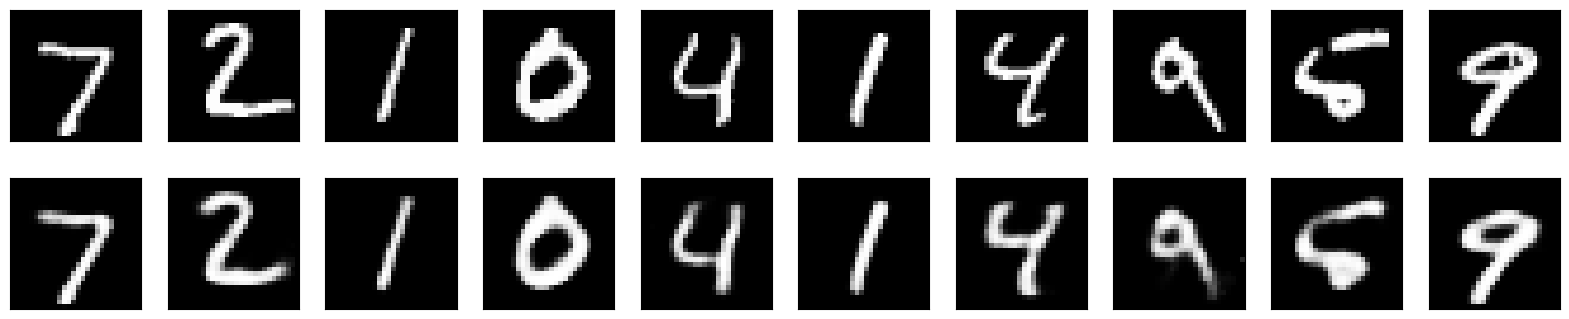

In [ ]:
# Evaluate the autoencoder
loss = autoencoder.evaluate(x_test, x_test)
print(f"Test Loss: {loss}")

# Predict the test set
decoded_imgs = autoencoder.predict(x_test)

# Visualize some reconstructed images
n = 10  # number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
# Encoder model
encoder = Model(input_layer, encoded)

# Get the encoded representations
encoded_imgs = encoder.predict(x_test)

# Print the shape of encoded representations
print(f"Encoded representations shape: {encoded_imgs.shape}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Encoded representations shape: (10000, 32)


In [ ]:
#2
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam



In [ ]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the data to 1D vectors
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# Print the shapes
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')


x_train shape: (60000, 784)
x_test shape: (10000, 784)


In [ ]:
# Dimensions
input_dim = x_train.shape[1]
encoding_dim = 64  # Dimensionality of the encoding space

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(256, activation='relu')(input_layer)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

# Print the model summary
autoencoder.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 784)                 │         201,488 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 484,944 (1.85 MB)

 Trainable params: 484,944 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.3071 - val_loss: 0.1382
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.1304 - val_loss: 0.1111
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 0.1101 - val_loss: 0.1015
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1014 - val_loss: 0.0969
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 0.0964 - val_loss: 0.0923
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - loss: 0.0928 - val_loss: 0.0896
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 0.0902 - val_loss: 0.0877
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0881 - val_loss: 0.0856
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 0.0861 - val_loss: 0.0846
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0849 - val_loss: 0.0834
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.0839 - val_loss: 0.0824
Epoch 12/50
235/235 ━━━━━━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0715
Test Loss: 0.07193101942539215
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


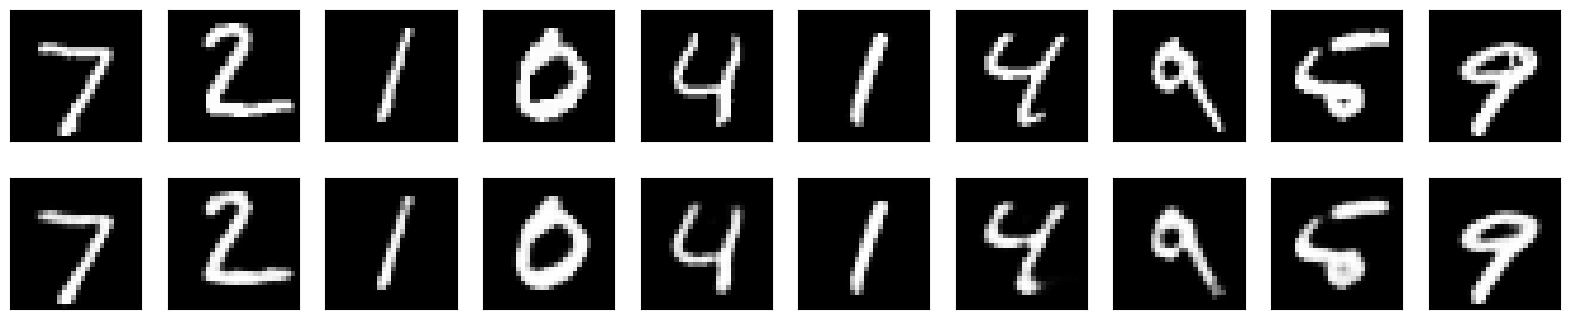

In [ ]:
# Evaluate the autoencoder
loss = autoencoder.evaluate(x_test, x_test)
print(f"Test Loss: {loss}")

# Predict the test set
decoded_imgs = autoencoder.predict(x_test)

# Visualize some reconstructed images
n = 10  # number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
# Encoder model
encoder = Model(input_layer, encoded)

# Get the encoded representations
encoded_imgs = encoder.predict(x_test)

# Print the shape of encoded representations
print(f"Encoded representations shape: {encoded_imgs.shape}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Encoded representations shape: (10000, 64)
